<a href="https://colab.research.google.com/github/sheetla-pandey/Code_Alpha_Internship_Project/blob/main/CodeAlpha_Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading a file from local system to Google Colab
from google.colab import files
uploaded = files.upload()


Saving Unemployment in India.csv to Unemployment in India.csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv


In [ ]:
#  Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the Dataset
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


*** Explore the Dataset***

In [ ]:
# Displaying summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [ ]:
# Displaying statistical summary of numerical columns
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [ ]:
# Returns a list of all column names
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

***Data Cleaning ***

In [ ]:
#  checking missing or null value in each columns
df.isnull().sum()

#  there is no any missing or null value in the columns

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Region.1,0
longitude,0
latitude,0


In [ ]:
# Convert Date Column
# We convert the Date column to datetime format for proper time series analysis.
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

*** Line Chart of Unemployment Over Time***

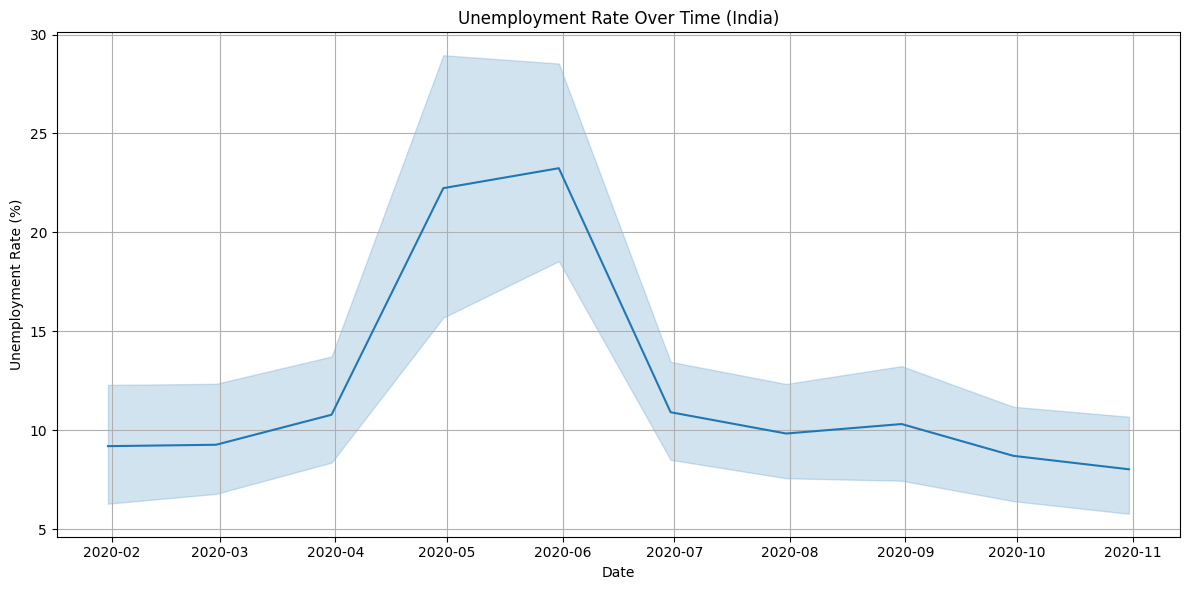

In [ ]:
# Plots a line graph showing the unemployment rate over time in India
# Shows overall unemployment trends over the full timeline — maybe from 2016 to 2020/2021.
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate Over Time (India)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


***Covid-19 Impact Analysis (2020–2021)***

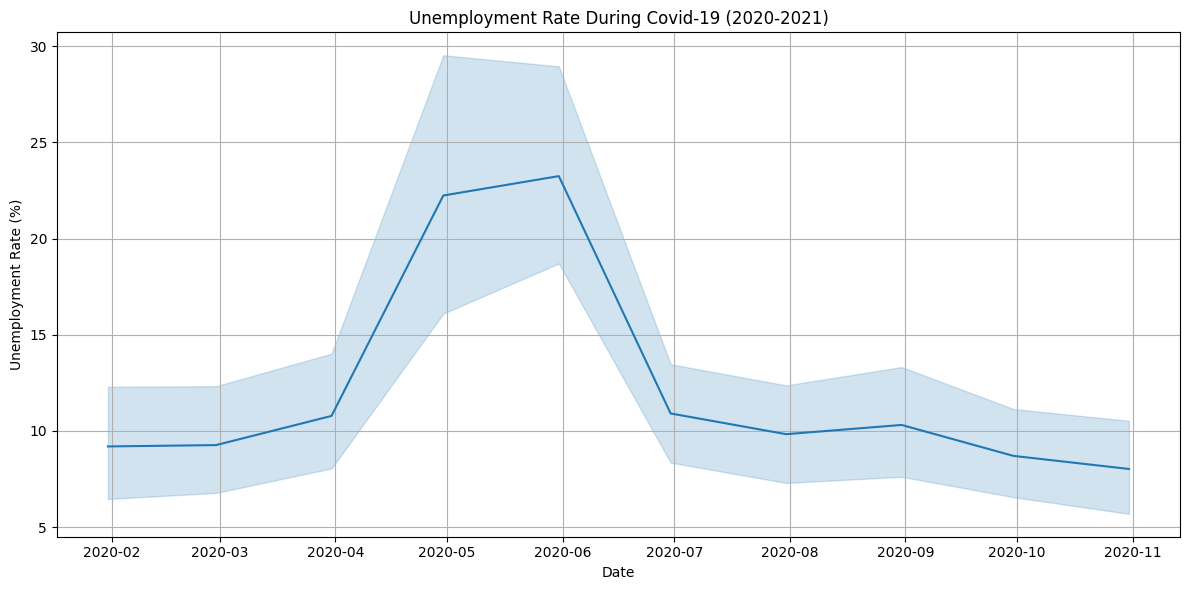

In [ ]:
# Filter Covid period
# Focuses on the time period of Covid-19 (usually Jan 2020 – Dec 2021) and plots unemployment during that time.
covid_df = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2021-12-31')]

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_df, x='Date', y=' Estimated Unemployment Rate (%)')
plt.title("Unemployment Rate During Covid-19 (2020-2021)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


***Seasonal Trends (Month-wise Average)***

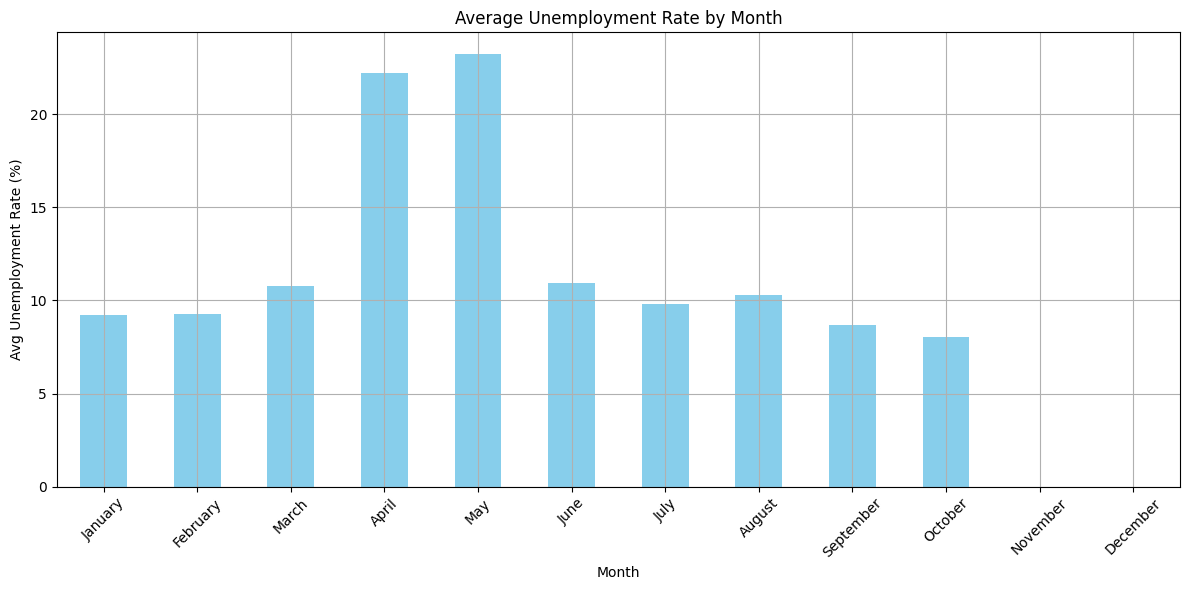

In [ ]:
# Extract Month
df['Month'] = df['Date'].dt.month_name()

# Group and plot
monthly_avg = df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title("Average Unemployment Rate by Month")
plt.xlabel("Month")
plt.ylabel("Avg Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


***Analyze Covid-19 Impact***

In [ ]:
# Filter and compare unemployment before and during Covid:
pre_covid = df[df[' Date'] < '2020-03-01']
during_covid = df[df[' Date'] >= '2020-03-01']

print("Pre-Covid Average:", pre_covid[' Estimated Unemployment Rate (%)'].mean())
print("During Covid Average:", during_covid[' Estimated Unemployment Rate (%)'].mean())

Pre-Covid Average: 9.231346153846154
During Covid Average: 12.963860465116278


*** Final Summary / Insights***

In [ ]:
### 📌 Summary & Insights

- Unemployment increased significantly during the Covid-19 lockdown (2020).
- Seasonal trend observed: peak unemployment in mid-year months like May–July.
- Some states consistently have high unemployment rates (check choropleth if added).
- The dataset can guide policy-makers to focus on seasonal employment schemes.
- Visualizing trends helps in planning economic recovery and job support programs.
